# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (18,9)

In [3]:
plt.rcParams['axes.labelsize'] = 20

In [4]:
sns.set_style('darkgrid')

### Reading relevent dataframes

In [5]:
# Reading 'covid_19_data.csv' file into corona
corona = pd.read_csv(r'covid_19_data.csv')

In [6]:
# Reading 'countries of the world.csv' into countries
countries = pd.read_csv(r'C:\Users\ssiva\OneDrive\Documents\Machine Learning_\countries-of-the-world\countries of the world.csv')

## Preliminary EDA

In [7]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17372 entries, 0 to 17371
Data columns (total 8 columns):
SNo                17372 non-null int64
ObservationDate    17372 non-null object
Province/State     8638 non-null object
Country/Region     17372 non-null object
Last Update        17372 non-null object
Confirmed          17372 non-null float64
Deaths             17372 non-null float64
Recovered          17372 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.1+ MB


In [8]:
corona.describe()

,SNo,Confirmed,Deaths,Recovered
count,17372.000000,17372.000000,17372.000000,17372.000000
mean,8686.500000,2728.469837,157.762376,677.526364
std,5015.008774,13971.163403,1229.777237,5119.658520
min,1.000000,0.000000,0.000000,0.000000
25%,4343.750000,9.000000,0.000000,0.000000
50%,8686.500000,92.000000,1.000000,1.000000
75%,13029.250000,621.000000,7.000000,60.000000
max,17372.000000,258361.000000,24648.000000,95200.000000


In [9]:
# Dropping 'SNo' Column since it provides no useful information

In [10]:
corona.head(3)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0


### Creating a new dataframe, top_latest_corona, that contains the latest information (04/21/2020) for the top 80 countries affected by corona

In [11]:
top_latest_corona = corona[corona['ObservationDate'] == '04/21/2020'].groupby('Country/Region').sum().sort_values('Confirmed',ascending = False).head(80).reset_index()

In [12]:
top_latest_corona

,Country/Region,SNo,Confirmed,Deaths,Recovered
0,US,1055592,823786.0,44845.0,75204.0
1,Spain,17203,204178.0,21282.0,82514.0
2,Italy,17130,183957.0,24648.0,51600.0
3,France,190164,159297.0,20829.0,39819.0
4,Germany,17111,148291.0,5033.0,95200.0
5,UK,189897,130172.0,17378.0,638.0
6,Turkey,17217,95591.0,2259.0,14918.0
7,Iran,17126,84802.0,5297.0,60965.0
8,Mainland China,536343,82779.0,4632.0,77125.0
9,Russia,17184,52763.0,456.0,3873.0


In [13]:
top_corona_countries = list(top_latest_corona['Country/Region'])

In [14]:
top_corona_countries

['US',
 'Spain',
 'Italy',
 'France',
 'Germany',
 'UK',
 'Turkey',
 'Iran',
 'Mainland China',
 'Russia',
 'Brazil',
 'Belgium',
 'Canada',
 'Netherlands',
 'Switzerland',
 'Portugal',
 'India',
 'Peru',
 'Ireland',
 'Sweden',
 'Austria',
 'Israel',
 'Saudi Arabia',
 'Japan',
 'Chile',
 'South Korea',
 'Ecuador',
 'Poland',
 'Pakistan',
 'Romania',
 'Singapore',
 'Mexico',
 'Denmark',
 'United Arab Emirates',
 'Norway',
 'Indonesia',
 'Czech Republic',
 'Belarus',
 'Serbia',
 'Philippines',
 'Australia',
 'Qatar',
 'Ukraine',
 'Malaysia',
 'Dominican Republic',
 'Panama',
 'Colombia',
 'Finland',
 'Luxembourg',
 'Egypt',
 'South Africa',
 'Bangladesh',
 'Morocco',
 'Argentina',
 'Algeria',
 'Thailand',
 'Moldova',
 'Greece',
 'Hungary',
 'Kuwait',
 'Kazakhstan',
 'Bahrain',
 'Croatia',
 'Iceland',
 'Uzbekistan',
 'Iraq',
 'Estonia',
 'Oman',
 'Azerbaijan',
 'New Zealand',
 'Armenia',
 'Lithuania',
 'Slovenia',
 'Bosnia and Herzegovina',
 'North Macedonia',
 'Slovakia',
 'Cameroon',
 '

### Creating a new dataframe, grouped_time_series that contains all the data for all recorded days, grouped by date and Country/Region (index was reset)

In [15]:
grouped_time_series = corona[corona['Country/Region'].isin(top_corona_countries)].groupby(['ObservationDate','Country/Region']).sum().reset_index()

In [16]:
grouped_time_series.head()

,ObservationDate,Country/Region,SNo,Confirmed,Deaths,Recovered
0,01/22/2020,Japan,36,2.0,0.0,0.0
1,01/22/2020,Mainland China,535,547.0,17.0,28.0
2,01/22/2020,South Korea,38,1.0,0.0,0.0
3,01/22/2020,Thailand,37,2.0,0.0,0.0
4,01/22/2020,US,32,1.0,0.0,0.0


### Following plots display 'Confirmed','Deaths', and 'Recovered' timeseries data for the top 20 countries over the recorded time period.

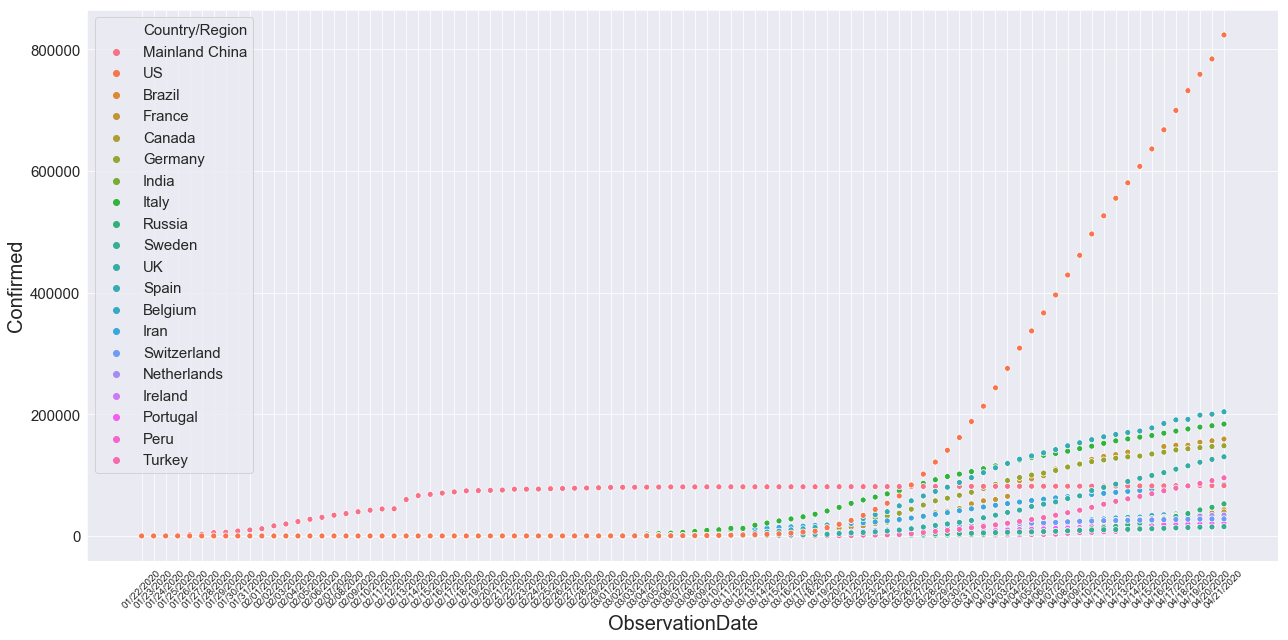

In [17]:
sns.scatterplot(data = grouped_time_series[grouped_time_series['Country/Region'].isin(top_corona_countries[0:20])], y = 'Confirmed',x = 'ObservationDate',hue = 'Country/Region')
plt.legend(fontsize = 15)
plt.xticks(rotation = 45)
plt.yticks(size = 15)
plt.tight_layout()

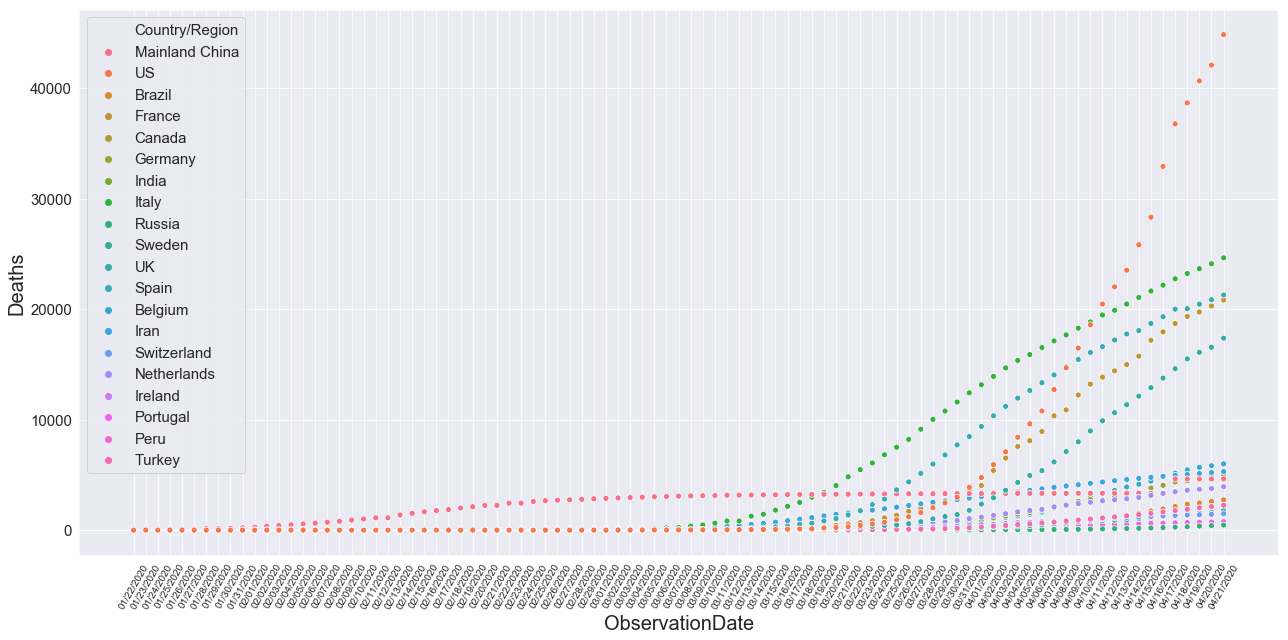

In [18]:
sns.scatterplot(data = grouped_time_series[grouped_time_series['Country/Region'].isin(top_corona_countries[0:20])], y = 'Deaths',x = 'ObservationDate',hue = 'Country/Region')
plt.legend(fontsize = 15)
plt.xticks(rotation = 60)
plt.yticks(size = 15)
plt.tight_layout()

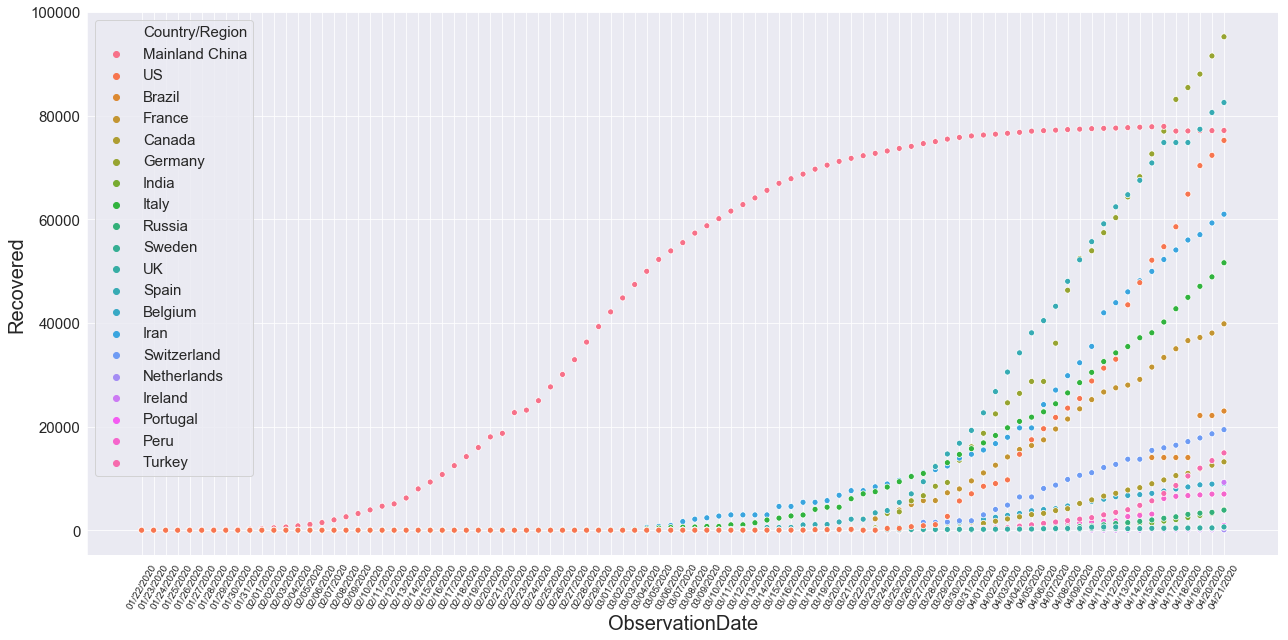

In [19]:
sns.scatterplot(data = grouped_time_series[grouped_time_series['Country/Region'].isin(top_corona_countries[0:20])], y = 'Recovered',x = 'ObservationDate',hue = 'Country/Region')
plt.legend(fontsize = 15)
plt.xticks(rotation = 60)
plt.yticks(size = 15)
plt.tight_layout()

### Preliminary EDA on countries dataframe

In [20]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null object
Coastline (coast/area ratio)          227 non-null object
Net migration                         224 non-null object
Infant mortality (per 1000 births)    224 non-null object
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null object
Phones (per 1000)                     223 non-null object
Arable (%)                            225 non-null object
Crops (%)                             225 non-null object
Other (%)                             225 non-null object
Climate                               205 non-null object
Birthrate                 

In [21]:
countries.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [22]:
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [281]:
#### One discrepancy I noticed was that the area was wrongly reported as sq. mi instead of sq. km which also reflected the error in the population density
countries.rename(columns = {'Area (sq. mi.)': 'Area (sq. km.)', 'Pop. Density (per sq. mi.)': 'Pop. Density (per sq. km.)'},inplace = True)

In [23]:
countries.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

# Joining countries dataframe and top_latest_corona dataframe

#### First need to check if there are any discrepancies in column names or values

In [24]:
top_latest_corona[top_latest_corona['Country/Region'].isin(list(countries['Country']))]

,Country/Region,SNo,Confirmed,Deaths,Recovered


#### Since none of the names are matching from the two dataframe, I am checking for any discrepancies in the countries dataframe

In [25]:
countries.loc[0,'Country']

'Afghanistan '

#### The country names have a space at the end.  I am removing that space

In [26]:
countries['Country'] = countries['Country'].apply(lambda country: country[:-1])

In [27]:
countries.loc[0,'Country']

'Afghanistan'

#### Now that the country names in country dataframe have been properly cleaned, I am once again checking if the two datasets have matching country names

In [28]:
matching_countries = list(top_latest_corona[top_latest_corona['Country/Region'].isin(list(countries['Country']))]['Country/Region'].values)
matching_countries

['Spain',
 'Italy',
 'France',
 'Germany',
 'Turkey',
 'Iran',
 'Russia',
 'Brazil',
 'Belgium',
 'Canada',
 'Netherlands',
 'Switzerland',
 'Portugal',
 'India',
 'Peru',
 'Ireland',
 'Sweden',
 'Austria',
 'Israel',
 'Saudi Arabia',
 'Japan',
 'Chile',
 'Ecuador',
 'Poland',
 'Pakistan',
 'Romania',
 'Singapore',
 'Mexico',
 'Denmark',
 'United Arab Emirates',
 'Norway',
 'Indonesia',
 'Czech Republic',
 'Belarus',
 'Serbia',
 'Philippines',
 'Australia',
 'Qatar',
 'Ukraine',
 'Malaysia',
 'Dominican Republic',
 'Panama',
 'Colombia',
 'Finland',
 'Luxembourg',
 'Egypt',
 'South Africa',
 'Bangladesh',
 'Morocco',
 'Argentina',
 'Algeria',
 'Thailand',
 'Moldova',
 'Greece',
 'Hungary',
 'Kuwait',
 'Kazakhstan',
 'Bahrain',
 'Croatia',
 'Iceland',
 'Uzbekistan',
 'Iraq',
 'Estonia',
 'Oman',
 'Azerbaijan',
 'New Zealand',
 'Armenia',
 'Lithuania',
 'Slovenia',
 'Slovakia',
 'Cameroon',
 'Cuba',
 'Afghanistan',
 'Ghana']

In [288]:
len(matching_countries)

74

#### It seems six countries have misaligned naming.  I am finding out which of the countries' names need to be adjusted in order to match

In [29]:
nonmatching_countries = list(top_latest_corona[top_latest_corona['Country/Region'].isin(list(countries['Country'])) == 0]['Country/Region'].values)
nonmatching_countries

['US',
 'UK',
 'Mainland China',
 'South Korea',
 'Bosnia and Herzegovina',
 'North Macedonia']

#### 'US', 'UK', 'Mainland China',  'South_Korea', 'Bosina and Herzegovina', and 'North Macedonia' in top_latest_corona dataframe have differently named corresponding countries in the countries dataframe

In [30]:
pd.set_option('display.max_rows',None)

In [31]:
countries[countries['Country'].isin(top_corona_countries) == 0]


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900.0,"42,0","7,8","2,41","0,24","97,35",NaN,"45,11","24,2","0,096","0,658","0,246"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"
10,Aruba,LATIN AMER. & CARIB,71891,193,"372,5","35,49",0,"5,89",28000.0,"97,0","516,1","10,53",0,"89,47",2,"11,03","6,68","0,004","0,333","0,663"
14,"Bahamas, The",LATIN AMER. & CARIB,303770,13940,"21,8","25,41","-2,2","25,21",16700.0,"95,6","460,6","0,8","0,4","98,8",2,"17,57","9,05","0,03","0,07","0,9"
17,Barbados,LATIN AMER. & CARIB,279912,431,"649,5","22,51","-0,31","12,5",15700.0,"97,4","481,9","37,21","2,33","60,46",2,"12,71","8,67","0,06","0,16","0,78"
20,Belize,LATIN AMER. & CARIB,287730,22966,"12,5","1,68",0,"25,69",4900.0,"94,1","115,7","2,85","1,71","95,44",2,"28,84","5,72","0,142","0,152","0,612"


#### 'US','UK', 'Mainland China', 'South Korea', 'Bosnia and Herzegovina', and 'North Macedonia' are named 'United States', 'United Kingdom','China', 'Korea, South', 'Bosnia & Herzegovina' and 'Macedonia' respectively in the countries dataframe.  I am creating a mapper that contains all the country names in countries df as keys and all country names in tlc df as values

In [32]:
d_countries_to_tlc_mapper = {}
for country in list(countries['Country'].values):
    d_countries_to_tlc_mapper[country] = country

d_countries_to_tlc_mapper.update({'United States': 'US', 'United Kingdom': 'UK','China':'Mainland China','Korea, South': 'South Korea','Bosnia & Herzegovina':'Bosnia and Herzegovina','Macedonia':'North Macedonia'})

#### Creating a function to correct country names

In [33]:
countries['Country'] = countries['Country'].apply(lambda country: d_countries_to_tlc_mapper[country])

In [34]:
countries[countries['Country'].isin(['US','UK','Mainland China','South Korea','Bosnia and Herzegovina','North Macedonia'])]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
25,Bosnia and Herzegovina,EASTERN EUROPE,4498976,51129,"88,0","0,04","0,31","21,05",6100.0,NaN,"215,4","13,6","2,96","83,44",4,"8,77","8,27","0,142","0,308","0,55"
42,Mainland China,ASIA (EX. NEAR EAST),1313973713,9596960,"136,9","0,15","-0,4","24,18",5000.0,"90,9","266,7","15,4","1,25","83,35","1,5","13,25","6,97","0,125","0,473","0,403"
110,South Korea,ASIA (EX. NEAR EAST),48846823,98480,"496,0","2,45",0,"7,05",17800.0,"97,9","486,1","17,18","1,95","80,87",3,10,"5,85","0,033","0,403","0,563"
123,North Macedonia,EASTERN EUROPE,2050554,25333,"80,9","0,00","-1,45","10,09",6700.0,NaN,"260,0","22,26","1,81","75,93",3,"12,02","8,77","0,118","0,319","0,563"
213,UK,WESTERN EUROPE,60609153,244820,"247,6","5,08","2,19","5,16",27700.0,"99,0","543,5","23,46","0,21","76,33",3,"10,71","10,13","0,005","0,237","0,758"
214,US,NORTHERN AMERICA,298444215,9631420,"31,0","0,21","3,41","6,5",37800.0,"97,0","898,0","19,13","0,22","80,65",3,"14,14","8,26","0,01","0,204","0,787"


In [295]:
countries.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. km.)                         0
Pop. Density (per sq. km.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [35]:
l_strings = []
l_floats = []
l_ints = []

In [36]:
for i in range(len(countries.index)):
    if type(countries.loc[i,'Climate']) == str:
        l_strings.append(i)
    elif type(countries.loc[i,'Climate']) == float:
        l_floats.append(i)
    elif type(countries.loc[i,'Climate']) == int:
        l_ints.append(i)


In [37]:
l_floats

[5,
 36,
 50,
 66,
 78,
 101,
 115,
 118,
 120,
 121,
 129,
 137,
 138,
 141,
 145,
 169,
 171,
 174,
 177,
 181,
 186,
 200]

since 'Climate' and other columns have nan values, it is considered float values.  This will be dealt with later

In [38]:
countries.head(1)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"


In [39]:
import math

#### I noticed that several columns had values with commas instead of periods, so I am treating those columns

In [40]:
for col in countries.drop('GDP ($ per capita)',axis = 1).columns[4:]:
    countries[col] = countries[col].apply(lambda col_val: float('.'.join(col_val.split(','))) if type(col_val) != float else col_val)


In [41]:
countries.head(1)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.0,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.6,20.34,0.38,0.24,0.38


In [42]:
countries.loc[2,'Climate']

1.0

In [43]:
top_countries = countries[countries['Country'].isin(top_corona_countries)]

In [44]:
top_countries.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          0
Infant mortality (per 1000 births)     0
GDP ($ per capita)                     0
Literacy (%)                           3
Phones (per 1000)                      0
Arable (%)                             0
Crops (%)                              0
Other (%)                              0
Climate                               10
Birthrate                              1
Deathrate                              1
Agriculture                            0
Industry                               0
Service                                0
dtype: int64

In [46]:
na_country_cols = list(top_countries.isna().sum()[top_countries.isna().sum() != 0].keys())

In [47]:
na_country_cols

['Literacy (%)', 'Climate', 'Birthrate', 'Deathrate']

In [48]:
top_countries[top_countries['Climate'].isna()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
36,Canada,NORTHERN AMERICA,33098932,9984670,3.3,2.02,5.96,4.75,29800.0,97.0,552.2,4.96,0.02,95.02,NaN,10.78,7.80,0.022,0.294,0.684
50,Croatia,EASTERN EUROPE,4494749,56542,79.5,10.32,1.58,6.84,10600.0,98.5,420.4,26.09,2.27,71.65,NaN,9.61,11.48,0.070,0.308,0.622
101,Italy,WESTERN EUROPE,58133509,301230,193.0,2.52,2.07,5.94,26700.0,98.6,430.9,27.79,9.53,62.68,NaN,8.72,10.40,0.021,0.291,0.688
120,Lithuania,BALTICS,3585906,65200,55.0,0.14,-0.71,6.89,11400.0,99.6,223.4,45.22,0.91,53.87,NaN,8.75,10.98,0.055,0.325,0.620
121,Luxembourg,WESTERN EUROPE,474413,2586,183.5,0.00,8.97,4.81,55100.0,100.0,515.4,23.28,0.40,76.32,NaN,11.94,8.41,0.010,0.130,0.860
137,Moldova,C.W. OF IND. STATES,4466706,33843,132.0,0.00,-0.26,40.42,1800.0,99.1,208.1,55.30,10.79,33.91,NaN,15.70,12.64,0.213,0.233,0.555
141,Morocco,NORTHERN AFRICA,33241259,446550,74.4,0.41,-0.98,41.62,4000.0,51.7,40.4,19.61,2.17,78.22,NaN,21.98,5.58,0.217,0.357,0.426
169,Russia,C.W. OF IND. STATES,142893540,17075200,8.4,0.22,1.02,15.39,8900.0,99.6,280.6,7.33,0.11,92.56,NaN,9.95,14.65,0.054,0.371,0.575
181,Serbia,EASTERN EUROPE,9396411,88361,106.3,0.00,-1.33,12.89,2200.0,93.0,285.8,33.35,3.20,63.45,NaN,NaN,NaN,0.166,0.255,0.579
186,Slovenia,EASTERN EUROPE,2010347,20273,99.2,0.23,1.12,4.45,19000.0,99.7,406.1,8.60,1.49,89.91,NaN,8.98,10.31,0.028,0.369,0.603


In [50]:
for column in na_country_cols:
    for country_ind in top_countries[top_countries[column].isna()].index:
        top_countries[column] = top_countries[column].apply(lambda col_value: top_countries.mean()[column] if math.isnan(col_value) else col_value)

C:\Users\ssiva\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
top_countries.isna().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

#### All top countries in countries df are correctly named and there are no null values.  The two dataframes can now be joined on their respective country columns

In [52]:
top_merged_corona = top_latest_corona.merge(top_countries,how = 'left',left_on = 'Country/Region',right_on = 'Country')

In [53]:
top_merged_corona

,Country/Region,SNo,Confirmed,Deaths,Recovered,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,US,1055592,823786.0,44845.0,75204.0,US,NORTHERN AMERICA,298444215,9631420,31.0,...,898.0,19.13,0.22,80.65,3.000000,14.140000,8.260000,0.010,0.204,0.787
1,Spain,17203,204178.0,21282.0,82514.0,Spain,WESTERN EUROPE,40397842,504782,80.0,...,453.5,26.07,9.87,64.06,3.000000,10.060000,9.720000,0.040,0.295,0.665
2,Italy,17130,183957.0,24648.0,51600.0,Italy,WESTERN EUROPE,58133509,301230,193.0,...,430.9,27.79,9.53,62.68,2.335714,8.720000,10.400000,0.021,0.291,0.688
3,France,190164,159297.0,20829.0,39819.0,France,WESTERN EUROPE,60876136,547030,111.3,...,586.4,33.53,2.07,64.40,4.000000,11.990000,9.140000,0.022,0.214,0.764
4,Germany,17111,148291.0,5033.0,95200.0,Germany,WESTERN EUROPE,82422299,357021,230.9,...,667.9,33.85,0.59,65.56,3.000000,8.250000,10.620000,0.009,0.296,0.695
5,UK,189897,130172.0,17378.0,638.0,UK,WESTERN EUROPE,60609153,244820,247.6,...,543.5,23.46,0.21,76.33,3.000000,10.710000,10.130000,0.005,0.237,0.758
6,Turkey,17217,95591.0,2259.0,14918.0,Turkey,NEAR EAST,70413958,780580,90.2,...,269.5,30.93,3.31,65.76,3.000000,16.620000,5.970000,0.117,0.298,0.585
7,Iran,17126,84802.0,5297.0,60965.0,Iran,ASIA (EX. NEAR EAST),68688433,1648000,41.7,...,276.4,8.72,1.39,89.89,1.000000,17.000000,5.550000,0.116,0.424,0.460
8,Mainland China,536343,82779.0,4632.0,77125.0,Mainland China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,...,266.7,15.40,1.25,83.35,1.500000,13.250000,6.970000,0.125,0.473,0.403
9,Russia,17184,52763.0,456.0,3873.0,Russia,C.W. OF IND. STATES,142893540,17075200,8.4,...,280.6,7.33,0.11,92.56,2.335714,9.950000,14.650000,0.054,0.371,0.575


In [55]:
top_merged_corona.drop(['Country/Region','SNo','Region'],axis = 1,inplace = True)

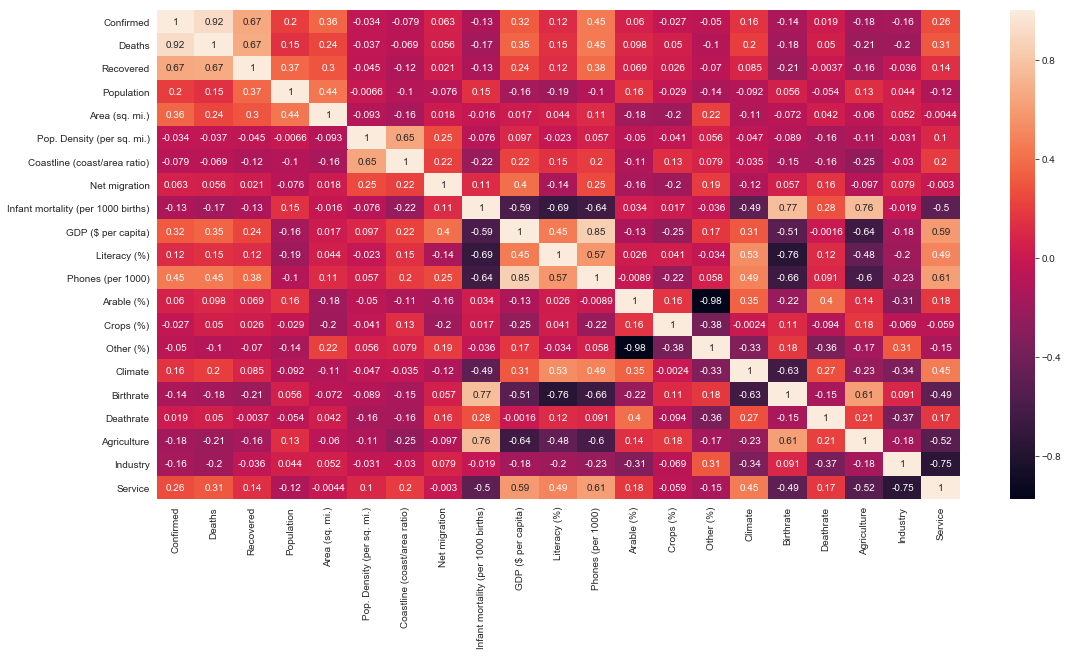

In [56]:
sns.heatmap(top_merged_corona.corr(),annot = True)

In [57]:
# Shows how each column correlatess to 'Confirmed' column
top_merged_corona.corr()['Confirmed']

Confirmed                             1.000000
Deaths                                0.919761
Recovered                             0.665041
Population                            0.197938
Area (sq. mi.)                        0.362321
Pop. Density (per sq. mi.)           -0.034425
Coastline (coast/area ratio)         -0.079282
Net migration                         0.062634
Infant mortality (per 1000 births)   -0.133948
GDP ($ per capita)                    0.316535
Literacy (%)                          0.118037
Phones (per 1000)                     0.449178
Arable (%)                            0.059635
Crops (%)                            -0.027451
Other (%)                            -0.049805
Climate                               0.158229
Birthrate                            -0.137231
Deathrate                             0.019494
Agriculture                          -0.176589
Industry                             -0.161911
Service                               0.260646
Name: Confirm

### I want to eliminate columns which are not highly correlated with output column 'Confirmed'

In [58]:
correlated_columns = list(top_merged_corona.corr()['Confirmed'][(top_merged_corona.corr()['Confirmed'] > 0.2) | (top_merged_corona.corr()['Confirmed'] < -0.2)].index)

In [59]:
correlated_columns

['Confirmed',
 'Deaths',
 'Recovered',
 'Area (sq. mi.)',
 'GDP ($ per capita)',
 'Phones (per 1000)',
 'Service']

In [60]:
top_merged_corona = top_merged_corona[['Country'] + correlated_columns]

In [61]:
top_merged_corona.head()

,Country,Confirmed,Deaths,Recovered,Area (sq. mi.),GDP ($ per capita),Phones (per 1000),Service
0,US,823786.0,44845.0,75204.0,9631420,37800.0,898.0,0.787
1,Spain,204178.0,21282.0,82514.0,504782,22000.0,453.5,0.665
2,Italy,183957.0,24648.0,51600.0,301230,26700.0,430.9,0.688
3,France,159297.0,20829.0,39819.0,547030,27600.0,586.4,0.764
4,Germany,148291.0,5033.0,95200.0,357021,27600.0,667.9,0.695


# Linear Regression

In [62]:
def convert_cat(df, cat_cols, output_var = 'Output'):
    """
    This function converts all categorical columns into numerical boolean columns.
    
    There are 3 parameters: df, cat_cols, and output_var. 
    
    1. df is the dataframe which needs to have categorical variables converted to numerical variables
    2. cat_cols needs to be a list that contains the names of all categorical columns that need to be converted.
    3. output_var is the name of the output or response variable.  It is set to 'Output' as default."""
    
    df.reset_index(inplace = True, drop = True)
    df_out = df.copy()
    
    for col in cat_cols:
        dummy_col = pd.get_dummies(df_out[col],drop_first = True)
        df_out.drop(col,axis=1, inplace = True)
        df_out_minus_y = df_out.drop(output_var,axis= 1).join(dummy_col)
        df_out = df_out_minus_y.join(pd.DataFrame(df_out.loc[:,output_var]))
    
    return df_out

In [63]:
def normalize(df,cat_class = None):
    """
    This function takes in a dataframe as a parameter and returns the same dataframe with all the features normalized between 0 and 1 using rescaling (min-max normalization)
    """
    l_min = []
    l_max = []
    if cat_class == None:
        for col in df.columns:
            l_min.append(df.describe()[col]['min'])
            l_max.append(df.describe()[col]['max'])
        
        t_min = list(zip(df.columns, l_min))
        t_max = list(zip(df.columns, l_max))
 

    else:
        for col in df.drop(cat_class,axis = 1).columns:
            l_min.append(df.describe()[col]['min'])
            l_max.append(df.describe()[col]['max'])

        t_min = list(zip(df.drop(cat_class,axis = 1).columns, l_min))
        t_max = list(zip(df.drop(cat_class,axis = 1).columns, l_max))
    
   
    d_min = {}
    for col,val in t_min:
        d_min[col]=val
    
    d_max = {}
    for col,val in t_max:
        d_max[col]=val
    
    df_copy = df.copy()
    for key in d_min.keys():
        df_copy[key] = df_copy[key].apply(lambda x: (x - d_min[key])/ (d_max[key] - d_min[key]))
    
    return df_copy

In [64]:
def split_df(df,test_size = 0.3,df_to_return = 'df_train'):
    """
    This function takes in a Pandas DataFrame and returns a 
    dataframe that is a subset of that Pandas DataFrame.
    
    There are 3 parameters: df, test_size, and df_to_return
    
    df needs to be a Pandas DataFrame and is the superset dataframe to be divided.
    test_size is the proportion of the dataframe you want to be the testing dataset.
    test_size is set to 0.3 by default.
    df_to_return needs to specified as either 'df_train' or df_test' 
    to return the correct subset dataframe. df_to_return is set to 'df_train' by default
    """
    split_num = int(df.count()[0] * (1-test_size) //1)
    df_train = df.iloc[:split_num,:]
    df_test = df.iloc[split_num:,:]
    if df_to_return in ['df_train','train']:
        return df_train
    elif df_to_return in ['df_test','test']:
        return df_test

In [65]:
def check_accuracy(df = None,pred_df = None, test_df = None, algo = 'lin',target_class = None):
    """
    This function takes in a pandas DataFrame and returns the accuracy of the model
    
    There are 2 parameters: df and algo
    
    1. df needs to be a Pandas DataFrame and algo is the algorithm used.
    2. algo is set to 'lin' by default but can also be specified as 'log'"""
    
    if algo == 'lin':
        df_out = df.copy()
        df_out['error'] = df.iloc[:,-2] - df.iloc[:,-1]
        RMSE = (sum(df_out['error']**2)/df_out.count()[0]+1) ** 0.5
        acc = (np.mean(df_out.iloc[:,-3]) - RMSE) / np.mean(df_out.iloc[:,-3])
        return {'acc':acc,'RMSE':RMSE}
    
    elif algo == 'log':
        return sum(df['Correct?']/df.count()[0])
    
    elif algo == 'knn':
        pred = pred_df[target_class]
        test = test_df[target_class]
        return sum(pred == test) / len(pred)

# Linear Regression and Logistic Regression

In [66]:
def stoch_grad_desc(dataset,alpha = 0.3,epoch = 10,algo = 'lin'):
    """
    This function returns a list of the coefficients for the specified algorithm.  
    Currently, this function only performs Linear and Logistic Regression.
    
    The 4 parameters are: dataset, alpha, epoch, and algo
    
    1. dataset needs to be a pandas DataFrame
    2. alpha is the alpha value used in stochiastic gradient descent.  It is set at 0.3 by default.
    3. epoch is the number of iterations through each row in the dataset algorithm will perform.  epoch is set to 10 by default.
    4. algo is the specific algorithm to be used.  algo is 'lin' by default for Linear Regression but can also be specified as 'log' for Logistic Regression
    """
    dataset.reset_index(inplace = True, drop = True)
    count_rows = dataset.count()[1]
    from math import exp
    dataset_1 = pd.DataFrame(pd.Series(np.ones(dataset.count()[0])),columns = ['X0']).join(dataset)
    
    coeffs = list(np.zeros(len(dataset_1.columns[0:-1])))
    coeffs = [i + 1 for i in coeffs]
    
    for i in range(epoch):
        for row in range(count_rows):
            y = dataset_1.iloc[row,-1]
            output_terms = []
            
            for col in dataset_1.columns[:-1]:
                output_terms.append((coeffs[dataset_1.columns.get_loc(col)],dataset_1.loc[row,col]))
            output_list = [(x*y) for (x,y) in output_terms]
            output = sum(output_list)
            
            if algo == 'lin':
                pred = output
                for i in range(len(coeffs)):
                    coeffs[int(i)] += alpha * (dataset_1.iloc[row,-1] - pred) * dataset_1.iloc[row,int(i)]
                
            elif algo == 'log':
                pred = 1 / (1 + exp(-output))
                for i in range(len(coeffs)):
                    coeffs[i] = coeffs[i] + alpha * (y - pred) * pred * (1 - pred) * dataset_1.iloc[row,i]
                    
    return coeffs
        

In [67]:
def make_predictions(dataset, coeff_list,algo = 'lin'):
    """
    This function takes in a pandas DataFrame and a list that contains 
    coefficients for the specified algorith used in the stoch_grad_desc function
    and returns the same dataset (with the addition of the first column being 1s to
    represent X0 in the regression formula) plus a new column at the end, 'Prediction'.
    
    There are 3 parameters: dataset, coeff_list, and algo
    
    1. dataset is the dataframe to used to make predictions dataset needs to be a Pandas DataFrame
    2. coeff_list should be the list that was the result of running the stoch_grad_desc function
    3. algo is the specific algorithm to be used.  algo is set to 'lin' by default but can be set to 'log'"""
    
    from math import exp
    
    dataset.reset_index(inplace = True, drop = True)
    
    dataset_out = pd.DataFrame(pd.Series(np.ones(dataset.count()[0]))).join(dataset)
    dataset_out.rename(mapper = {0:'X0'},axis = 1, inplace = True)
    
    coeffs = coeff_list
    pred = []
    
    for row in range(dataset_out.count()[0]):
        output_terms = []
        for col in dataset_out.columns[0:-1]:
            output_terms.append((coeffs[dataset_out.columns.get_loc(col)],dataset_out.loc[row,col]))
        output_list = [x*y for (x,y) in output_terms]
        
        output = sum(output_list)
        if algo == 'lin':
            pred.append(output)
        
        elif algo == 'log':
            pred.append(1/(1 + exp(-output)))
    dataset_out = dataset_out.join(pd.DataFrame(pred))
    dataset_out.rename(mapper = {0: 'Prediction'},axis = 1, inplace = True)
    
    if algo == 'log':
        dataset_out['Crisp'] = dataset_out['Prediction'].apply(lambda predi: 1 if predi >= 0.5 else 0)
        dataset_out['Correct?'] = dataset_out.iloc[:,-3] == dataset_out['Crisp']
    
    return dataset_out

In [68]:
top_merged_corona.head(10)

,Country,Confirmed,Deaths,Recovered,Area (sq. mi.),GDP ($ per capita),Phones (per 1000),Service
0,US,823786.0,44845.0,75204.0,9631420,37800.0,898.0,0.787
1,Spain,204178.0,21282.0,82514.0,504782,22000.0,453.5,0.665
2,Italy,183957.0,24648.0,51600.0,301230,26700.0,430.9,0.688
3,France,159297.0,20829.0,39819.0,547030,27600.0,586.4,0.764
4,Germany,148291.0,5033.0,95200.0,357021,27600.0,667.9,0.695
5,UK,130172.0,17378.0,638.0,244820,27700.0,543.5,0.758
6,Turkey,95591.0,2259.0,14918.0,780580,6700.0,269.5,0.585
7,Iran,84802.0,5297.0,60965.0,1648000,7000.0,276.4,0.460
8,Mainland China,82779.0,4632.0,77125.0,9596960,5000.0,266.7,0.403
9,Russia,52763.0,456.0,3873.0,17075200,8900.0,280.6,0.575


In [69]:
top_merged_corona = top_merged_corona[list(top_merged_corona.columns[0:1]) + list(top_merged_corona.columns[4:]) + list(top_merged_corona.columns[2:4]) + list(top_merged_corona.columns[1:2])]

In [70]:
top_merged_corona.head(1)

,Country,Area (sq. mi.),GDP ($ per capita),Phones (per 1000),Service,Deaths,Recovered,Confirmed
0,US,9631420,37800.0,898.0,0.787,44845.0,75204.0,823786.0


In [71]:
norm_corona = normalize(top_merged_corona,cat_class = ['Country','Confirmed','Deaths','Recovered'])

In [72]:
norm_corona

,Country,Area (sq. mi.),GDP ($ per capita),Phones (per 1000),Service,Deaths,Recovered,Confirmed
0,US,0.564042,0.681985,1.000000,0.889894,44845.0,75204.0,823786.0
1,Spain,0.029524,0.391544,0.503241,0.705882,21282.0,82514.0,204178.0
2,Italy,0.017603,0.477941,0.477984,0.740573,24648.0,51600.0,183957.0
3,France,0.031999,0.494485,0.651766,0.855204,20829.0,39819.0,159297.0
4,Germany,0.020871,0.494485,0.742848,0.751131,5033.0,95200.0,148291.0
5,UK,0.014299,0.496324,0.603822,0.846154,17378.0,638.0,130172.0
6,Turkey,0.045677,0.110294,0.297608,0.585219,2259.0,14918.0,95591.0
7,Iran,0.096479,0.115809,0.305320,0.396682,5297.0,60965.0,84802.0
8,Mainland China,0.562024,0.079044,0.294479,0.310709,4632.0,77125.0,82779.0
9,Russia,1.000000,0.150735,0.310013,0.570136,456.0,3873.0,52763.0


In [83]:
shuffled_corona = norm_corona.sample(frac = 1).reset_index()

In [107]:
shuffled_corona_no_US = shuffled_corona[shuffled_corona['Country'] != 'US']

In [108]:
shuffled_corona_no_US.head()

,index,Country,Area (sq. mi.),GDP ($ per capita),Phones (per 1000),Service,Deaths,Recovered,Confirmed
0,17,Peru,0.075232,0.080882,0.085270,0.683258,484.0,6982.0,17837.0
1,43,Malaysia,0.019273,0.152574,0.196468,0.360483,92.0,3349.0,5482.0
2,74,North Macedonia,0.001445,0.110294,0.286992,0.552036,55.0,224.0,1231.0
3,21,Israel,0.001177,0.351103,0.513076,0.693816,184.0,4507.0,13942.0
4,31,Mexico,0.115487,0.152574,0.199374,0.761689,712.0,2627.0,8772.0


In [111]:
train_corona = split_df(df = shuffled_corona_no_US.drop(['index','Country','Deaths','Recovered'],axis = 1))

In [112]:
test_corona = split_df(df = shuffled_corona_no_US.drop(['index','Country','Deaths','Recovered'],axis = 1),df_to_return='test')

In [113]:
coeff_list_corona = stoch_grad_desc(train_corona,epoch = 100)

In [119]:
coeff_list_corona

[-10954.659453089462,
 49261.748454784574,
 -47108.523760924305,
 89813.44769337124,
 3433.533337641916]

In [115]:
corona_predictions = make_predictions(test_corona,coeff_list = coeff_list_corona)

In [116]:
corona_predictions

,X0,Area (sq. mi.),GDP ($ per capita),Phones (per 1000),Service,Confirmed,Prediction
0,1.0,0.004541,0.102941,0.150536,0.873303,4658.0,938.341517
1,1.0,0.029524,0.391544,0.503241,0.705882,204178.0,19676.178481
2,1.0,0.001005,0.336397,0.232231,0.481146,2080.0,-4242.865736
3,1.0,0.005372,0.318015,0.442557,0.717949,21379.0,16541.446409
4,1.0,0.002610,0.213235,0.369468,0.707391,1552.0,14740.751228
5,1.0,0.004873,0.538603,0.501788,0.725490,14873.0,11470.920739
6,1.0,0.066663,0.102941,0.193339,0.506787,4149.0,6584.424576
7,1.0,0.007688,0.354779,0.655454,0.808446,2401.0,34355.335150
8,1.0,0.012120,0.099265,0.353040,0.594268,6723.0,18714.315979
9,1.0,0.006454,0.040441,0.079906,0.734540,1137.0,-2843.147946


In [117]:
check_accuracy(test_corona.reset_index(),pred_df = corona_predictions)

{'RMSE': 70168.32063924747, 'acc': -111595.03378427846}

In [118]:
test_corona

,Area (sq. mi.),GDP ($ per capita),Phones (per 1000),Service,Confirmed
0,0.004541,0.102941,0.150536,0.873303,4658.0
1,0.029524,0.391544,0.503241,0.705882,204178.0
2,0.001005,0.336397,0.232231,0.481146,2080.0
3,0.005372,0.318015,0.442557,0.717949,21379.0
4,0.002610,0.213235,0.369468,0.707391,1552.0
5,0.004873,0.538603,0.501788,0.725490,14873.0
6,0.066663,0.102941,0.193339,0.506787,4149.0
7,0.007688,0.354779,0.655454,0.808446,2401.0
8,0.012120,0.099265,0.353040,0.594268,6723.0
9,0.006454,0.040441,0.079906,0.734540,1137.0


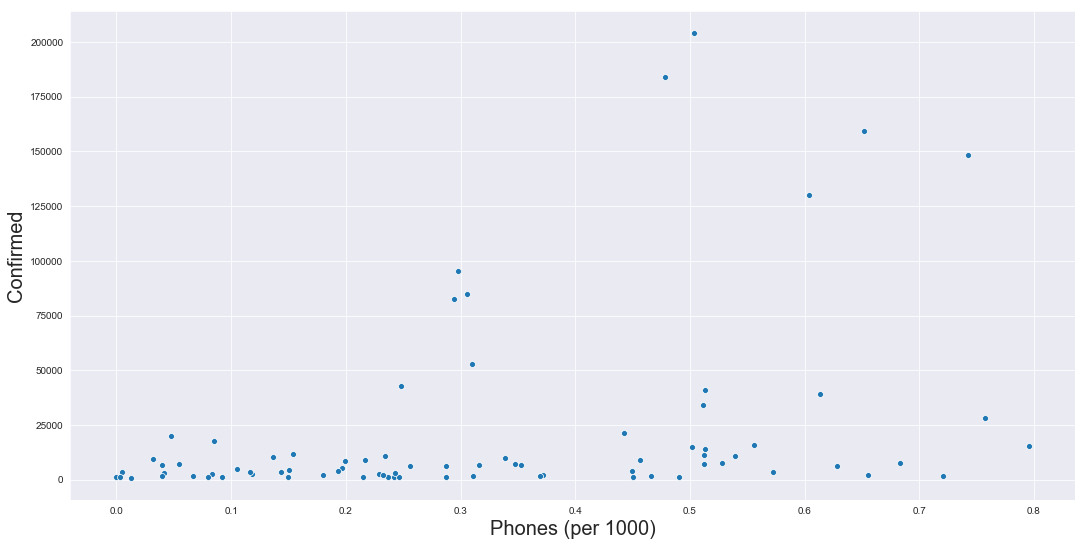

In [121]:
sns.scatterplot(data= shuffled_corona_no_US,x = 'Phones (per 1000)', y = 'Confirmed')